In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np
import pandas as pd
from matplotlib.ticker import LogFormatter 
from scipy.optimize import curve_fit
from pathlib import Path
import matplotlib.colors
from matplotlib import ticker, cm
%matplotlib notebook

# Mean length for SAW with no interaction

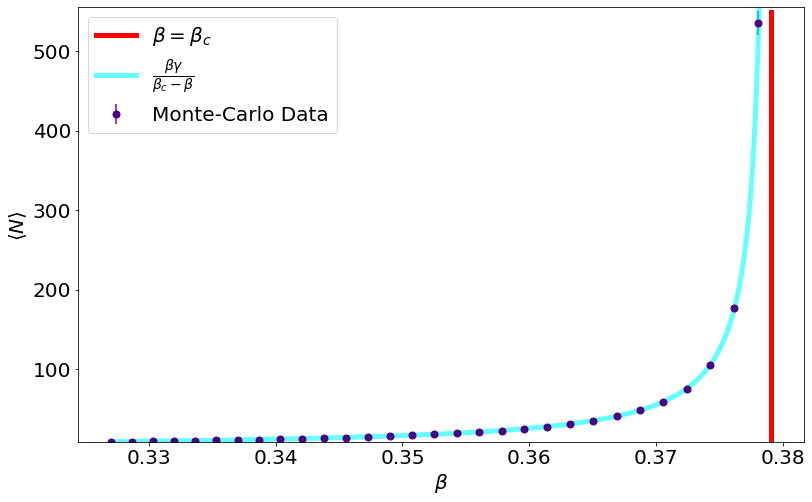

In [2]:
#results = np.loadtxt("/home/kamilla/SAWs/middle_results/mean_length_saw_case_4Mtoequ_20M_setps.txt", skiprows=1)

fig = plt.figure(figsize=(13, 8))
ax = fig.add_subplot(111)

results = np.loadtxt("/home/kamilla/SAWs/for_phase/properties_isaw_moresteps_0_higher_hpc.txt", skiprows=1)
results=results[results[:,-1]==1] 
#results=results[len(results)//2:, :]
chemical_potential = results[:,1] 
fugacity=np.exp(chemical_potential)
mean_n = results[:,2]
disps =  results[:,3]


plt.errorbar(fugacity, mean_n, yerr= disps, fmt = ".", ms=14,c = "indigo",ecolor="purple", label="Monte-Carlo Data")
plt.xlabel(r"$\beta$", fontsize = 20)
plt.ylabel(r"$\langle N\rangle$ ", fontsize=20)
plt.tick_params(axis='x', labelsize=20) 
plt.tick_params(axis='y', labelsize=20) 
 

plt.ylim(np.min(mean_n), np.max(mean_n)+20)

bc =1/2.63815856
 

y =43/32

plt.plot( [bc, bc], [-1, 550], c="r",  lw=5, label=r"$\beta=\beta_c$")

fugacity = np.linspace(np.min(fugacity), bc-0.0005, 1000)
f_t = fugacity*y/(bc-fugacity)

plt.plot( fugacity , f_t , "-", c="aqua",alpha = 0.6, lw=5,label = r"$\frac{\beta \gamma}{\beta_c-\beta}$")



#ax.set_yscale('log')
#ax.set_xscale('log')

plt.legend(loc='best', fontsize=20)


plt.savefig("/home/kamilla/SAWs/Bachelor thesis/img/mean_length_saw_no_interaction.png")

# Homopolymer 

In [3]:
def func(beta, A, beta_c):
    return A*beta/(beta_c-beta)


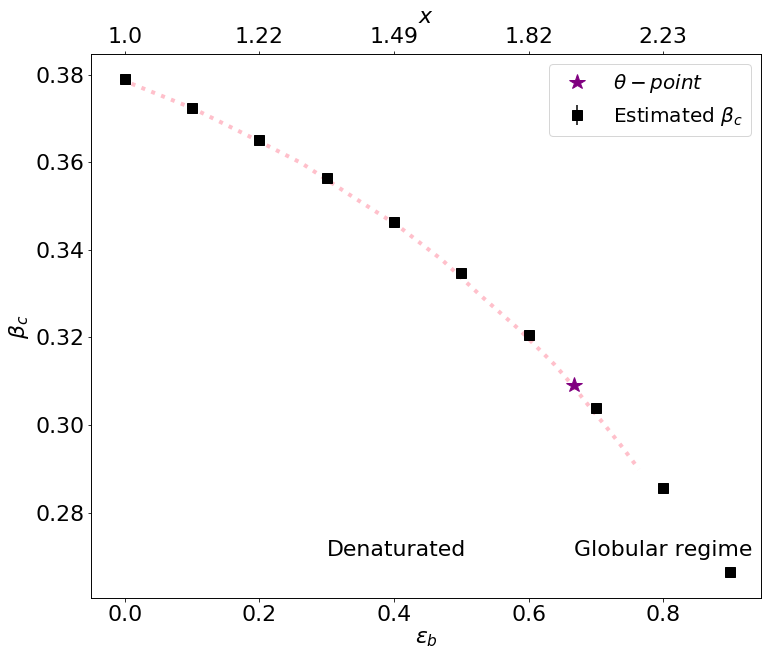

In [4]:
size = 10

v = np.zeros(size)
y = np.zeros(size)
sigmas = np.zeros(size)
ints = np.arange(size)
sigmasy = np.zeros(size)
for i in range(0, size):
    filename = "/home/kamilla/SAWs/for_phase/properties_isaw_moresteps_"+str(i)+"_higher_hpc.txt"
    results = np.loadtxt(filename, skiprows=1)
    results=results[results[:,2]<500]
    chemical_potential = results[:,1] 
    fugacity=np.exp(chemical_potential)
    mean_n = results[:,2]
    disps =  results[:,3]
    popt, pcov = curve_fit(func, fugacity, mean_n, absolute_sigma=True)
    #print(popt[0] )
    v[i]=popt[1] 
    perr = np.sqrt(np.diag(pcov))
    sigmas[i] =perr[1]
    y[i]=popt[0] 
    sigmasy[i] = perr[0]
    
v_homopolymer = v
   
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111)

plt.errorbar(ints/10, v , yerr=sigmas, fmt="s", c="k", ms = 10, label = r"Estimated $ \beta _c $")
plt.xlabel(r'$\epsilon_b$', fontsize = 22)
plt.ylabel(r"$\beta _c$ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 

#plt.grid("True")

compare = np.loadtxt("Homopolymer_simulations/data_from_article.csv", delimiter=",")

plt.plot(np.log(compare[:,0]), 1/compare[:,1],":",lw=4,c="pink")

plt.plot([0.6675], [0.3091], "*", markersize=16, c="purple", label = r"$\theta - point$"  )
#plt.plot([np.exp(0.6673), np.exp(0.6673)], [0.24, 0.31 ],  ":",c="aqua" ,lw=3.5 , label = r"$\theta - point$")

plt.legend(loc="best", fontsize=20)
label="Denaturated"
plt.annotate(label, xy=(0.3, 0.27), fontsize=22)

label="Globular regime"
plt.annotate(label, xy=(0.668, 0.27), fontsize=22)

ax2 = ax.twiny() 
ax2.set_xlabel(r'$x$', fontsize=22)
ax2.set_xticks(np.arange(0,10,2)/10)
ax2.tick_params(axis='x', labelsize=22)
ax2.set_xbound(ax.get_xbound())
ax2.set_xticklabels( np.round( np.exp(np.arange(0, 10, 2)/10), 2) )

plt.savefig("/home/kamilla/SAWs/Bachelor thesis/img/ph.png")

[Text(0, 1, '1.0'),
 Text(0, 1, '1.22'),
 Text(0, 1, '1.49'),
 Text(0, 1, '1.82'),
 Text(0, 1, '2.23')]

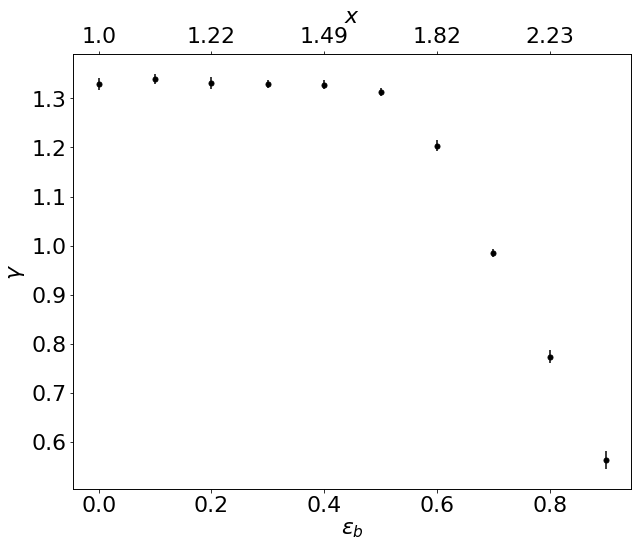

In [5]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)


plt.errorbar(ints/10, y, yerr=sigmasy, fmt=".", c="k", ms = 10, label = r"Estimated $ \gamma $")
plt.xlabel(r'$\epsilon_b$', fontsize = 22)
plt.ylabel(r"$\gamma$ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22)

ax2 = ax.twiny() 
ax2.set_xlabel(r'$x$', fontsize=22)
ax2.set_xticks(np.arange(0,10,2)/10)
ax2.tick_params(axis='x', labelsize=22)
ax2.set_xbound(ax.get_xbound())
ax2.set_xticklabels( np.round( np.exp(np.arange(0, 10, 2)/10), 2) )

In [6]:
print(v[0], sigmas[0])
print(y[0], sigmasy[0])
print(43/32.0 - y[0])

0.37900715615299446 3.4263479977144646e-05
1.3288982680124082 0.01236800329743736
0.01485173198759182


# HP-model

In [7]:
def func1(beta, A, beta_c):
    return A*beta/(0.5*beta_c-beta)

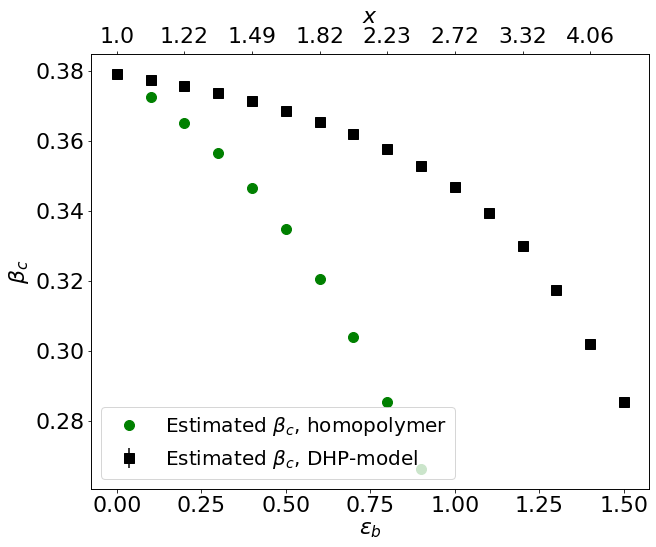

In [9]:

size = 16

v = np.zeros(size)
y = np.zeros(size)
sigmas = np.zeros(size)
ints = np.arange(size)
sigmasy = np.zeros(size)
 
for i in range(0, size):
    filename = "HP_simulations/for-phase/properties_isaw_moresteps_"+str(i)+"_higher_hpc.txt"
    results = np.loadtxt(filename, skiprows=1)
    results = results[results[:,3]<100]
    chemical_potential = results[:,1] 
    fugacity=np.exp(chemical_potential)
    mean_n = results[:,2]
    disps =  results[:,3]
    popt, pcov = curve_fit(func1, fugacity, mean_n)
    #print(popt[0] )
    v[i]=popt[1] 
    perr = np.sqrt(np.diag(pcov))
    sigmas[i] =perr[1]
    y[i]=popt[0] 
    sigmasy[i] =perr[0]
    
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

plt.errorbar(ints/10, v, yerr=sigmas, fmt="s", c="k", ms = 10, label = r"Estimated $ \beta _c $, DHP-model ")
plt.xlabel(r'$\epsilon_b$', fontsize = 22)
plt.ylabel(r"$\beta_c$ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 

plt.plot(ints[:10]/10, v_homopolymer,"o", c="g", ms = 10, label = r"Estimated $ \beta _c $, homopolymer ")
#plt.grid("True")

 
#plt.plot([0.6675], [0.3091], "*", markersize=14, c="purple", label = r"$\theta - point$"  )
#plt.plot([np.exp(0.6673), np.exp(0.6673)], [0.24, 0.31 ],  ":",c="aqua" ,lw=3.5 , label = r"$\theta - point$")

plt.legend(loc="best", fontsize=20)
 
ax2 = ax.twiny() 
ax2.set_xlabel(r'$x$', fontsize=22)
ax2.set_xticks(np.arange(0,16,2)/10)
ax2.tick_params(axis='x', labelsize=22)
ax2.set_xbound(ax.get_xbound())
ax2.set_xticklabels( np.round( np.exp(np.arange(0, 16, 2)/10), 2) )

plt.savefig("/home/kamilla/SAWs/Bachelor thesis/img/ph_hp.png")

<ErrorbarContainer object of 3 artists>

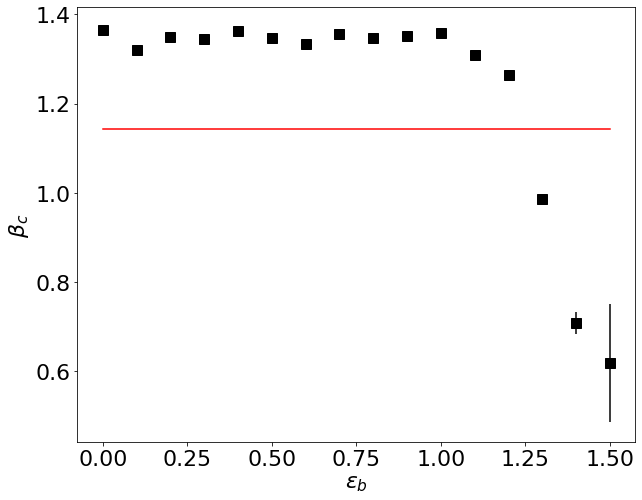

In [10]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

plt.errorbar(ints/10, y, yerr=sigmasy, fmt="s", c="k", ms = 10, label = r"Estimated $ \gamma $, DHP-model ")
plt.xlabel(r'$\epsilon_b$', fontsize = 22)
plt.ylabel(r"$\beta_c$ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
plt.errorbar([0, 1.5], [8/7, 8/7], fmt="-", c="r", ms = 10, label = r"Estimated $ \gamma $, DHP-model ")
#plt.grid("True")

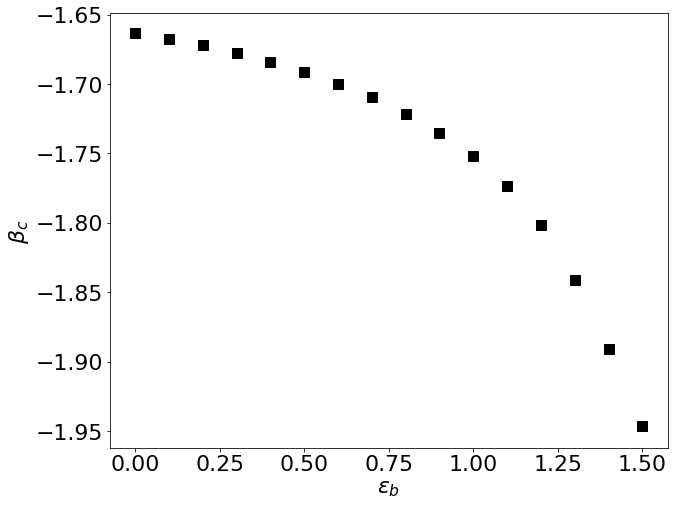

In [12]:

size = 16

v = np.zeros(size)
y = np.zeros(size)
sigmas = np.zeros(size)
ints = np.arange(size)
 
for i in range(0, size):
    filename = "HP_simulations/for-phase/properties_isaw_moresteps_"+str(i)+"_higher_hpc.txt"
    results = np.loadtxt(filename, skiprows=1)
    results = results[results[:,3]<100]
    chemical_potential = results[:,1] 
    fugacity=np.exp(chemical_potential)
    mean_n = results[:,2]
    disps =  results[:,3]
    popt, pcov = curve_fit(func1, fugacity, mean_n)
    #print(popt[0] )
    v[i]=popt[1] 
    perr = np.sqrt(np.diag(pcov))
    sigmas[i] =perr[1]
    y[i]=popt[0] 
    
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

plt.errorbar(ints/10, np.log(0.5*v), yerr=sigmas, fmt="s", c="k", ms = 10, label = r"Estimated $ \beta _c $, DHP-model ")
plt.xlabel(r'$\epsilon_b$', fontsize = 22)
plt.ylabel(r"$\beta_c$ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
 
#plt.grid("True")
